<a href="https://colab.research.google.com/github/Joshikakuna/Pregnancy-Risk-Alert-System/blob/main/Maternal_Health_Risk_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [46]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')
df.head()
df.shape

(1014, 7)

In [47]:
df['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


In [48]:
train, test = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 811
No. of testing examples: 203


In [49]:
y_test=test['RiskLevel']
x_test=test.drop('RiskLevel', axis=1)
x_test.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
805,19,120,80,7.0,98.0,70
298,23,90,60,7.7,98.0,76
243,32,120,65,6.0,101.0,76
262,40,160,100,19.0,98.0,77
61,15,80,60,7.0,98.0,80


In [50]:
#Setting training data into x_train and y_train
x_train=train.drop('RiskLevel',axis=1)
y_train=train['RiskLevel']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape

((811, 6), (811,), (203, 6))

In [51]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6157635467980296
Accuracy DT 0.7881773399014779


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [52]:
#Random Forest Regression
random_model=RandomForestRegressor(n_estimators=50)
random_model.fit(x_train,y_train)
print(random_model.score(x_train,y_train))

#Making predictions on test set
random_predict=random_model.predict(x_test)



0.8957625680933738


In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared (R2) score
r2 = r2_score(y_test, random_predict)
print("R-squared (R2) score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, random_predict)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, random_predict)
print("Mean Squared Error (MSE):", mse)

R-squared (R2) score: 0.7432717009017286
Mean Absolute Error (MAE): 0.2541112005010242
Mean Squared Error (MSE): 0.15558573471038442


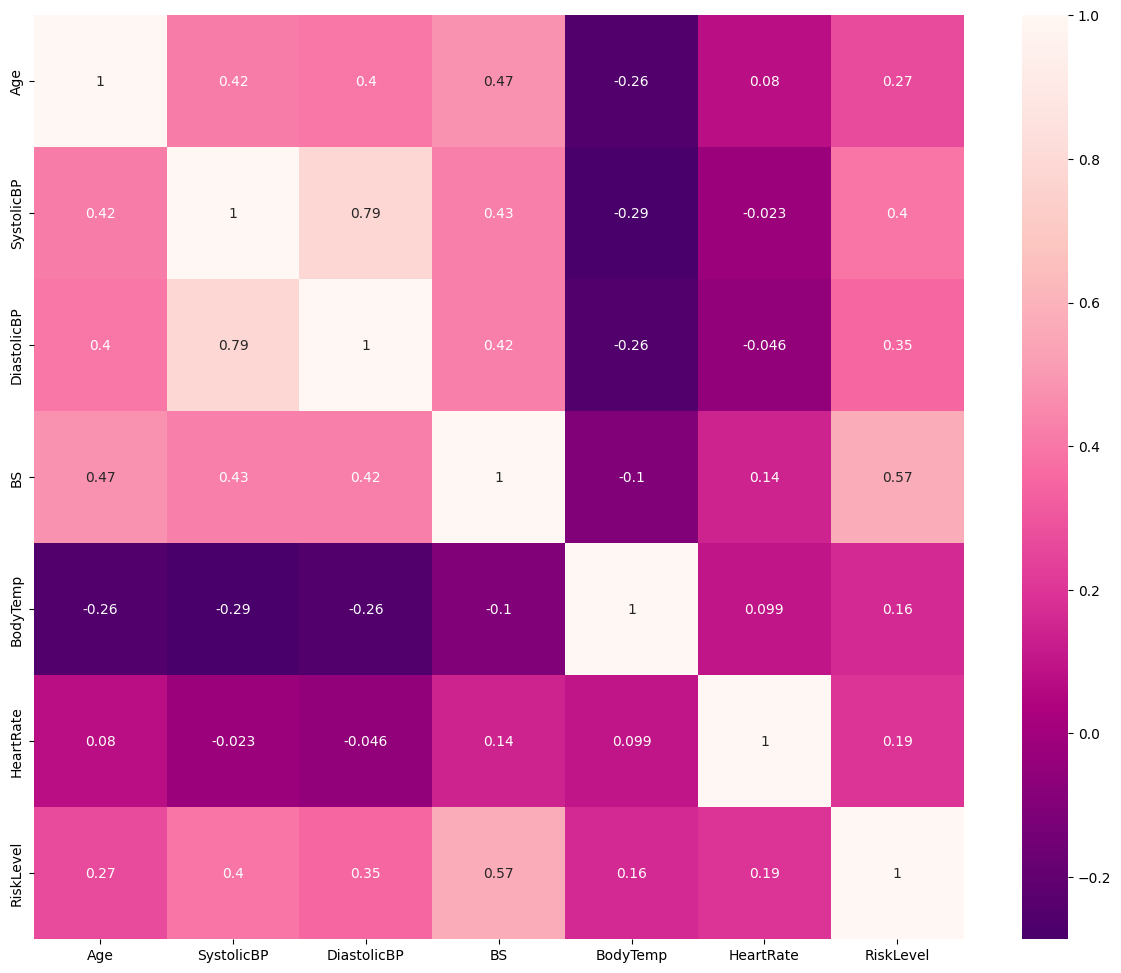

In [54]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='RdPu_r')
plt.show()

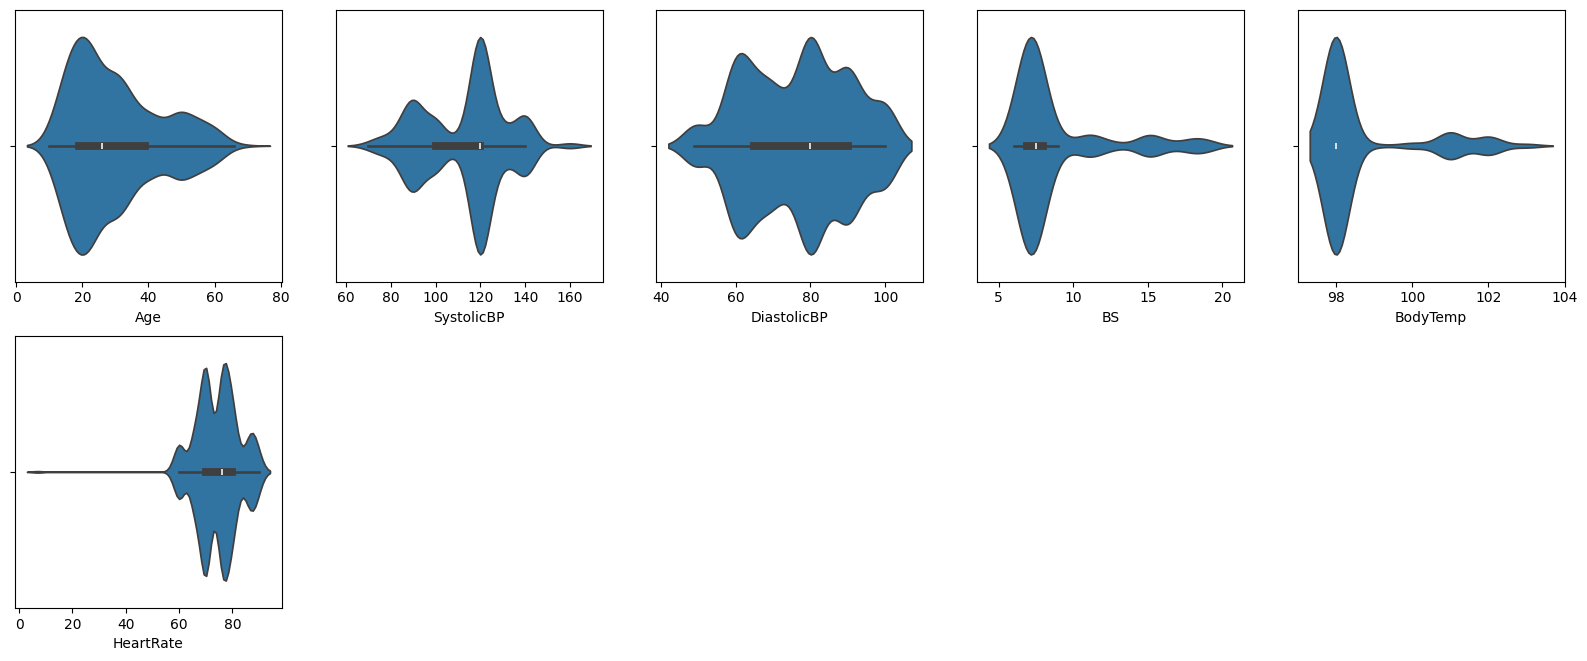

In [55]:
#cols = [i for i in df.columns]
#cols = [i for i in cols if i not in ['RiskLevel']]
#plt.figure(figsize=(20,12))
#for i in enumerate(cols):
    #num = i[0]+1
    #plt.subplot(3,5,num)
    #sns.violinplot(data=df, x=i[1])
#plt.show()

In [56]:
print(random_model.score(x_train,y_train))

0.8957625680933738


In [57]:
import plotly.graph_objs as go
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Accuracy Score<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=14),
    height=7),
    cells=dict(values=[['<b>Random Forest<b>'],
                                    [np.round(random_model.score(x_train,y_train).mean(),4),

                                    ]]))
                     ])
fig.update_layout(width=500, height=300)
fig.update_layout(title='Model Results')
fig.show()

In [81]:
test_data = pd.DataFrame({
    'Age': [19],
    'SystolicBP': [120],
    'DiastolicBP': [80],
    'BS': [7],
    'BodyTemp': [98],
    'HeartRate': [70]
})

# Make predictions using the trained model
predictions = random_model.predict(test_data)

print(predictions)

[1.83017312]


In [82]:
# Make predictions using the trained model
predictions = random_model.predict(test_data)
print(predictions)
if predictions >= 2.3 and predictions <= 3:
  print("High")
elif predictions >= 1.3 and predictions <= 2.2:
  print("Medium")
elif predictions >= 0 and predictions <= 1.2:
  print("Low")

[1.83017312]
Medium


In [60]:
import pickle

In [61]:
filename="trained_model.sav"
pickle.dump(random_model,open(filename,'wb'))

In [62]:
#loading the saved model
loaded_model = pickle.load(open("trained_model.sav",'rb'))


In [83]:
test_data = pd.DataFrame({
    'Age': [19],
    'SystolicBP': [120],
    'DiastolicBP': [80],
    'BS': [7],
    'BodyTemp': [98],
    'HeartRate': [70]
})

# Make predictions using the trained model
predictions = loaded_model.predict(test_data)
print(predictions)
if predictions >= 2.3 and predictions <= 3:
  print("High")
elif predictions >= 1.3 and predictions <= 2.2:
  print("Medium")
elif predictions >= 0 and predictions <= 1.2:
  print("Low")

[1.83017312]
Medium
